# IFT6135-A2022
# Assignment 1: Practical

You must fill in your answers to various questions in this notebook, following which you must export this notebook to a Python file named `solution.py` and submit it on Gradescope.

Only edit the functions specified in the PDF (and wherever marked – `# WRITE CODE HERE`). Do not change definitions or edit the rest of the template, else the autograder will not work.

**Make sure you request a GPU runtime (especially for Question 3)!**

In [2]:
# DO NOT MODIFY!
import matplotlib.pyplot as plt
import numpy as np
import random

# Fix random seed
random.seed(0)
np.random.seed(0)

## Question 1: Implementing MLPs with NumPy (30 points)

In [3]:
class NN(object):
  """
    Implements an MLP.
  """

  def __init__(self,
               dims=(784, 128, 64, 10), # h_0, h_1, h_2, h_3
               activation="relu",       # Activation function
               epsilon=1e-6,            # Correction factor
               lr=0.01,                 # Learning rate
               seed=0                   # Random seed
              ):
    """
      Constructor of the NN class.

      dims: list or tuple or np.array, default (784, 128, 64, 10)
        Values of h_0 (no. of features), h_1 (hidden dim. 1), h_2 (hidden dim. 2), h_3 (no. of output classes).
      activation: string, default "relu"
        Activation function to use.
      epsilon: float or double, default 1e-6
        Correction factor to clip probabilities.
      lr: float or double, default 0.01
        Learning rate for weight updates.
      seed: int, default 0
        Random seed.
    """
    super(NN, self).__init__()

    self.dims = dims
    self.n_hidden = len(dims) - 2
    self.activation_str = activation
    self.epsilon = epsilon
    self.lr = lr
    self.seed = seed

  def initialize_weights(self):
    """
      Results: Initializes the weights of the MLP from uniform(-1/sqrt(h_0), 1/sqrt(h_0)) and the biases to zeros.
    """
    if self.seed is not None:
      np.random.seed(self.seed)

    self.weights = {}
    # self.weights is a dictionary with keys W1, b1, W2, b2, ..., Wm, Bm where m - 1 is the number of hidden layers
    # The keys W1, W2, ..., Wm correspond to weights while b1, b2, ..., bm correspond to biases
    for layer_n in range(1, self.n_hidden + 2):
      # WRITE CODE HERE
      self.weights[f"b{layer_n}"] = np.zeros((1, self.dims[layer_n]))
      self.weights[f"W{layer_n}"] = np.random.uniform(low=-1/np.sqrt(self.dims[0]), high=1/np.sqrt(self.dims[0]), size=(self.dims[layer_n-1], self.dims[layer_n]))

  def relu(self, x, grad=False):
    """
      x: np.array
        Inputs to calculate ReLU(x) for. x may contain a batch of inputs!
      grad: bool, default False
        If True, return the gradient of the activation with respect to the inputs to the function.

      Outputs: Implements the ReLU activation function or its gradient.
    """
    if grad:
      # WRITE CODE HERE
      gradient = np.greater(x, 0).astype(float)

      return gradient
    # WRITE CODE HERE

    output = np.maximum(x,0)

    return output

  def sigmoid(self, x, grad=False):
    """
      x: np.array
        Inputs to calculate sigmoid(x) for. x may contain a batch of inputs!
      grad: bool, default False
        If True, return the gradient of the activation with respect to the inputs to the function.

      Outputs: Implements the Sigmoid activation function or its gradient.
    """
    if grad:
      # WRITE CODE HERE
      gradient = np.exp(-x)/(np.exp(-x)+1)**2

    # WRITE CODE HERE
    output = 1/(1 + np.exp(-x))

    if grad:
      output = gradient 

    return output

  def tanh(self, x, grad=False):
    """
      x: np.array
        Inputs to calculate tanh(x) for. x may contain a batch of inputs!
      grad: bool, default False
        If True, return the gradient of the activation with respect to the inputs to the function.

      Outputs: Implements the tanh activation function or its gradient.
    """
    if grad:
      # WRITE CODE HERE
      gradient = 1 - ((np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)))**2
    # WRITE CODE HERE
    output = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    if grad:
      output = gradient

    return output

  def activation(self, x, grad=False):
    """
      x: np.array
        Inputs to calculate activation(x) for. x may contain a batch of inputs!
      grad: bool, default False
        If True, return the gradient of the activation with respect to the inputs to the function.

      Outputs: Returns the value of the activation or the gradient.
    """
    if self.activation_str == "relu":
      # WRITE CODE HERE
      output = self.relu(x, grad)
      pass
    elif self.activation_str == "sigmoid":
      # WRITE CODE HERE
      output = self.sigmoid(x, grad)
      pass
    elif self.activation_str == "tanh":
      # WRITE CODE HERE
      output = self.tanh(x, grad)

    else:
      raise Exception("Invalid activation")
      
    return output

  def softmax(self, x):
    """
      x: np.array
        Inputs to calculate softmax over. x may contain a batch of inputs!

      Outputs: Implements the softmax function, returns the array containing softmax(x).
    """
    # Remember that softmax(x-C) = softmax(x) when C is a constant.
    # WRITE CODE HERE

    x_max = np.max(x, axis=-1).reshape(x.shape[0],-1)
    x = x - x_max
    e_x = np.exp(x)
    e_x_sum = np.sum(e_x, axis=-1).reshape(x.shape[0],-1)
    output = e_x/e_x_sum

    return output

  def forward(self, x):
    """
      x: np.array
        Inputs to the MLP. Note that x may contain multiple input examples, not just one example.

      Outputs: Implements the forward pass, returns cache as described below.
    """
    cache = {"Z0": x}
    # cache is a dictionary with keys Z0, A1, Z1, ..., Am, Zm where m - 1 is the number of hidden layers
    # Z0 just contains the inputs x to the network
    # Ai corresponds to the preactivation at layer i, Zi corresponds to the activation at layer i
    # WRITE CODE HERE

    for layer_n in range(1, self.n_hidden + 2):
      w = self.weights[f"W{layer_n}"] 
      b = self.weights[f"b{layer_n}"] 
      
      cache[f"A{layer_n}"] = np.dot(cache[f"Z{layer_n-1}"],w)+b
      if layer_n == self.n_hidden+1:
        cache[f"Z{layer_n}"] = self.softmax(cache[f"A{layer_n}"]) 
      else: 
        cache[f"Z{layer_n}"] = self.activation(cache[f"A{layer_n}"])
    
    return cache

  def loss(self, prediction, labels):
    """
      prediction: np.array
        Predicted probabilities for each class for inputs. May contain multiple examples (a batch)!
      labels: np.array
        True labels corresponding to the inputs (assume they are one-hot encoded). May contain multiple examples (a batch)!

      Outputs: Returns the crossentropy loss (take the mean over number of inputs).
    """
    prediction[np.where(prediction < self.epsilon)] = self.epsilon
    prediction[np.where(prediction > 1 - self.epsilon)] = 1 - self.epsilon
    # WRITE CODE HERE
    
    num_samples = labels.shape[0]

    l = np.sum((labels*np.log(prediction)))

    cross_entropy = -1/num_samples*(l)
    
    return cross_entropy

  def backward(self, cache, labels):
    """
      cache: np.array
        Results of the backward pass. This may be for multiple examples (a batch).
      labels: np.array
        True labels corresponding to the inputs in cache. May contain multiple examples (a batch)!

      Outputs: Implements the backward pass, returns grads as described below.
    """
    output = cache[f"Z{self.n_hidden + 1}"]
    grads = {}

    # grads is a dictionary with keys dAm, dWm, dbm, dZ(m-1), dA(m-1), ..., dW1, db1
    # Remember to account for the number of input examples!
    # WRITE CODE HERE
    num_samples = cache["Z0"].shape[0] 

    grads[f"dA{self.n_hidden+1}"] = output - labels
    grads[f"dW{self.n_hidden+1}"] = 1/num_samples*np.dot(cache[f"Z{self.n_hidden}"].T, grads[f"dA{self.n_hidden+1}"])
    grads[f"db{self.n_hidden+1}"] = 1/num_samples*np.sum(grads[f"dA{self.n_hidden+1}"], axis=0,keepdims=True)

    for layer in range(self.n_hidden,0, -1):

      grads[f"dZ{layer}"] = np.dot(grads[f"dA{layer+1}"], self.weights[f"W{layer+1}"].T)
      grads[f"dA{layer}"] = grads[f"dZ{layer}"]*self.activation(cache[f"A{layer}"], grad=True)
      grads[f"dW{layer}"] = 1/num_samples*np.dot(cache[f"Z{layer-1}"].T, grads[f"dA{layer}"])
      grads[f"db{layer}"] = 1/num_samples*np.sum(grads[f"dA{layer}"], axis=0,keepdims=True)
  

    return grads


  def update(self, grads):
    """
      grads: np.dictionary
        Gradients obtained from the backward pass.

      Results: Updates the network's weights and biases.
    """
    for layer in range(1, self.n_hidden + 2):
      # WRITE CODE HERE
      self.weights[f"W{layer}"] = self.weights[f"W{layer}"] - self.lr * grads[f"dW{layer}"]
      self.weights[f"b{layer}"] = self.weights[f"b{layer}"] - self.lr * grads[f"db{layer}"]


      pass

## Question 2: Implementing CNN layers with NumPy (20 points)
Note: You may assume that there are no biases, no input padding (valid convolution) and also that convolution here refers to cross-correlation, i.e., no kernel flipping when convolving the inputs.

In [4]:
class Convolution2dLayer(object):
  """
    Implements a 2D convolution layer.
  """

  def __init__(self, filter_size=3, stride=1, n_units=64, seed=0):
    """
      Constructor of the Convolution2dLayer class.

      Note: We assume that the input images have only a single channel.

      filter_size: int, default 3
        Filter size to use for convolution. We assume equal height and width.
      stride: int, default 1
        Stride for convolution.
      n_units: int, default 64
        Number of output channels, i.e., number of filters in the layer.
      seed: int, default 0
        Random seed.
    """
    super(Convolution2dLayer, self).__init__()

    self.filter_size = filter_size
    self.stride = stride
    self.n_units = n_units
    self.seed = seed

  def initialize_weights(self):     
    """
      Results: Initializes the weights of the CNN from uniform(0, 1).
    """   
    if self.seed is not None:
      np.random.seed(self.seed)

    # self.weights is an np.array of shape (n_units, filter_size, filter_size)
    # We do not consider biases in this convolution layer implementation
    # WRITE CODE HERE

    self.weights = np.random.uniform(low=0,high=1,size=(self.n_units,self.filter_size,self.filter_size))

  def forward(self, x):
    """
      x: np.array
        Inputs to convolve. This may contain multiple input examples, not just one.
        Note: We assume that the input images have only a single channel, e.g. (5, 1, 32, 32) where 5 is the number of
        images, 1 channel, 32x32 image size.

      Outputs: Inputs and the result of the convolution operation on the inputs stored in cache.

      Note: You need not flip the kernel! You may just implement cross-correlation.
    """
    cache = {}

    # cache is a dictionary where cache["x"] stores the inputs and cache["out"] stores the outputs of the layer
    # WRITE CODE HERE
    cache["x"] = x
    num_images = cache["x"].shape[0]
    num_channels_input = cache["x"].shape[1]
    W = cache["x"].shape[2]
    H = cache["x"].shape[3]
    padding = 0
    n_H = int((W-self.filter_size+2*padding)/self.stride+1)
    n_W = int((H-self.filter_size+2*padding)/self.stride+1)

    output = np.zeros((num_images, self.n_units, n_H, n_W))

    for image in range(num_images):
      x_slice = x[image,0,:,:]
      for j in range(n_H):
        for k in range(n_W):
          mult = np.multiply(x_slice[j:j+self.filter_size, k:k+self.filter_size], self.weights)
          output[image,:,j,k] = np.sum(np.sum(mult,axis=-1),axis=-1)


    cache["out"] = output
    
    return cache

  def backward(self, cache, grad_output):
    """
      cache: dictionary
        Contains the inputs and the result of the convolution operation applied on them.
      grad_output: np.array
        Gradient of the loss with respect to the outputs of the convolution layer.

      Outputs: Gradient of the loss with respect to the parameters of the convolution layer.
    """
    grads = None
    # grads is an np.array containing the gradient of the loss with respect to the parameters in the convolution layer
    # Remember to account for the number of input examples!
    # WRITE CODE HERE

    
    pass
    return grads


class MaxPooling2dLayer(object):
  """
    Implements a 2D max-pooling layer.
  """

  def __init__(self, filter_size=2):
    """
      Constructor of the MaxPooling2dLayer class.

      filter_size: int, default 2
        Filter size to use for max-pooling. We assume equal height and width, and stride = height = width.
    """
    super(MaxPooling2dLayer, self).__init__()
  
    self.filter_size = filter_size
    self.stride = filter_size

  def forward(self, x):
    """
      x: np.array
        Inputs to compute max-pooling for. This may contain multiple input examples, not just one.
        Note: The input dimensions to max-pooling are the output dimensions of the convolution!

      Outputs: Inputs and the result of the max-pooling operation on the inputs stored in cache.
    """
    cache = {}

    # cache is a dictionary where cache["x"] stores the inputs and cache["out"] stores the outputs of the layer
    # WRITE CODE HERE
    cache["x"] = x
    num_images = cache["x"].shape[0]
    num_channels = cache["x"].shape[1]
    W = cache["x"].shape[2]
    H = cache["x"].shape[3]
    padding = 0
    n_H = int((W-self.filter_size+2*padding)/self.stride+1)
    n_W = int((H-self.filter_size+2*padding)/self.stride+1)

    output = np.zeros((num_images, num_channels, n_H, n_W))

    for image in range(num_images):
      x_slice = x[image,:,:,:]
      for j in range(n_H):
        for k in range(n_W):
          output[image,:,j,k] = np.max(np.max(x_slice[:,j*self.stride:j*self.stride+self.filter_size, k*self.stride:k*self.stride+self.filter_size],axis=-1),axis=-1)  
             
    cache["out"] = output
    return cache

  def backward(self, cache, grad_output):
    """
      cache: dictionary
        Contains the inputs and the result of the max-pooling operation applied on them.
      grad_output: np.array
        Gradient of the loss with respect to the outputs of the max-pooling layer.

      Outputs: Gradient of the loss with respect to the inputs to the max-pooling layer.
    """
    grads = None # WRITE CODE HERE (initialize grads correctly)

    # grads is an np.array containing the gradient of the loss with respect to the inputs to the max-pooling layer
    # Remember to account for the number of input examples!
    # WRITE CODE HERE
    pass
    return grads

In [5]:
class Convolution2dLayer(object):
  """
    Implements a 2D convolution layer.
  """

  def __init__(self, filter_size=3, stride=1, n_units=64, seed=0):
    """
      Constructor of the Convolution2dLayer class.

      Note: We assume that the input images have only a single channel.

      filter_size: int, default 3
        Filter size to use for convolution. We assume equal height and width.
      stride: int, default 1
        Stride for convolution.
      n_units: int, default 64
        Number of output channels, i.e., number of filters in the layer.
      seed: int, default 0
        Random seed.
    """
    super(Convolution2dLayer, self).__init__()

    self.filter_size = filter_size
    self.stride = stride
    self.n_units = n_units
    self.seed = seed

  def initialize_weights(self):     
    """
      Results: Initializes the weights of the CNN from uniform(0, 1).
    """   
    if self.seed is not None:
      np.random.seed(self.seed)

    # self.weights is an np.array of shape (n_units, filter_size, filter_size)
    # We do not consider biases in this convolution layer implementation
    # WRITE CODE HERE

    self.weights = np.random.uniform(low=0,high=1,size=(self.n_units,self.filter_size,self.filter_size))

  def forward(self, x):
    """
      x: np.array
        Inputs to convolve. This may contain multiple input examples, not just one.
        Note: We assume that the input images have only a single channel, e.g. (5, 1, 32, 32) where 5 is the number of
        images, 1 channel, 32x32 image size.

      Outputs: Inputs and the result of the convolution operation on the inputs stored in cache.

      Note: You need not flip the kernel! You may just implement cross-correlation.
    """
    cache = {}

    # cache is a dictionary where cache["x"] stores the inputs and cache["out"] stores the outputs of the layer
    # WRITE CODE HERE
    cache["x"] = x
    num_images = cache["x"].shape[0]
    num_channels_input = cache["x"].shape[1]
    W = cache["x"].shape[2]
    H = cache["x"].shape[3]
    padding = 0
    n_H = int((W-self.filter_size+2*padding)/self.stride+1)
    n_W = int((H-self.filter_size+2*padding)/self.stride+1)

    output = np.zeros((num_images, self.n_units, n_H, n_W))

    for image in range(num_images):
      x_slice = x[image,0,:,:]
      for j in range(n_H):
        for k in range(n_W):
          mult = np.multiply(x_slice[j:j+self.filter_size, k:k+self.filter_size], self.weights)
          output[image,:,j,k] = np.sum(np.sum(mult,axis=-1),axis=-1)


    cache["out"] = output
    
    return cache

  def backward(self, cache, grad_output):
    """
      cache: dictionary
        Contains the inputs and the result of the convolution operation applied on them.
      grad_output: np.array
        Gradient of the loss with respect to the outputs of the convolution layer.

      Outputs: Gradient of the loss with respect to the parameters of the convolution layer.
    """
    
    # grads is an np.array containing the gradient of the loss with respect to the parameters in the convolution layer
    # Remember to account for the number of input examples!
    # WRITE CODE HERE
    x = cache["x"]
    num_images = grad_output.shape[0]
    num_channels = grad_output.shape[1]
    W = grad_output.shape[2]
    H = grad_output.shape[3]

    grads = np.zeros(self.weights.shape)

    for image in range(num_images):
      input_conv = x[image,:,:,:]

      for channel in range(num_channels):
        for j in range(W):
          for k in range(H):
            input_slice = input_conv[:,j:j+self.filter_size, k:k+self.filter_size].reshape(self.filter_size, self.filter_size)
            grads[channel,:,:]+=input_slice*grad_output[image, channel, j,k]
          

  
    return grads


class MaxPooling2dLayer(object):
  """
    Implements a 2D max-pooling layer.
  """

  def __init__(self, filter_size=2):
    """
      Constructor of the MaxPooling2dLayer class.

      filter_size: int, default 2
        Filter size to use for max-pooling. We assume equal height and width, and stride = height = width.
    """
    super(MaxPooling2dLayer, self).__init__()
  
    self.filter_size = filter_size
    self.stride = filter_size

  def forward(self, x):
    """
      x: np.array
        Inputs to compute max-pooling for. This may contain multiple input examples, not just one.
        Note: The input dimensions to max-pooling are the output dimensions of the convolution!

      Outputs: Inputs and the result of the max-pooling operation on the inputs stored in cache.
    """
    cache = {}

    # cache is a dictionary where cache["x"] stores the inputs and cache["out"] stores the outputs of the layer
    # WRITE CODE HERE
    cache["x"] = x
    num_images = cache["x"].shape[0]
    num_channels = cache["x"].shape[1]
    W = cache["x"].shape[2]
    H = cache["x"].shape[3]
    padding = 0
    n_H = int((W-self.filter_size+2*padding)/self.stride+1)
    n_W = int((H-self.filter_size+2*padding)/self.stride+1)

    output = np.zeros((num_images, num_channels, n_H, n_W))

    for image in range(num_images):
      x_slice = x[image,:,:,:]
      for j in range(n_H):
        for k in range(n_W):
          output[image,:,j,k] = np.max(np.max(x_slice[:,j*self.stride:j*self.stride+self.filter_size, k*self.stride:k*self.stride+self.filter_size],axis=-1),axis=-1)  
             
    cache["out"] = output
    return cache

  def backward(self, cache, grad_output):
    """
      cache: dictionary
        Contains the inputs and the result of the max-pooling operation applied on them.
      grad_output: np.array
        Gradient of the loss with respect to the outputs of the max-pooling layer.

      Outputs: Gradient of the loss with respect to the inputs to the max-pooling layer.
    """
    grads = None # WRITE CODE HERE (initialize grads correctly)
    grads = np.zeros(cache["x"].shape)
    # grads is an np.array containing the gradient of the loss with respect to the inputs to the max-pooling layer
    # Remember to account for the number of input examples!
    # WRITE CODE HERE
    x = cache["x"]
    num_images = grad_output.shape[0]
    num_channels = grad_output.shape[1]
    W = grad_output.shape[2]
    H = grad_output.shape[3]

    for image in range(num_images):
      input_pool = x[image,:,:,:]
      for channel in range(num_channels):
        for j in range(W):
          for k in range(H):
            input_pool_slice = input_pool[channel,j*self.stride:j*self.stride+self.filter_size, k*self.stride:k*self.stride+self.filter_size]
            mask = (input_pool_slice == np.max(input_pool_slice))
            grads[image,channel,j*self.stride:j*self.stride+self.filter_size, k*self.stride:k*self.stride+self.filter_size]+=mask*grad_output[image,channel,j,k]

    return grads

## Question 3: Implementing a CNN and comparison with MLPs using PyTorch (50 points)

In [6]:
# DO NOT MODIFY!
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
device = "cuda" if torch.cuda.is_available() else "cpu"

# Fix random seed
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [7]:
class ResidualBlock(nn.Module):
  """This class implements the Residual Block used in ResNet-18."""

  def __init__(self, in_channels, channels, conv_stride=1, activation_str="relu", initialization="xavier_normal"):
    """
      Constructor for the ResidualBlock class.

      in_channels: int
        Number of channels in the input to the block.
      channels: int
        Number of output channels for the block, i.e., number of filters.
      conv_stride: int, default 1
        Stride of the first convolution layer and downsampling convolution (if required).
      activation_str: string, default "relu"
        Activation function to use.
      initialization: string, default "xavier_normal"
        Initialization for convolution layer weights.
    """
    super(ResidualBlock, self).__init__()

    self.in_channels = in_channels
    self.channels = channels
    self.conv_stride = conv_stride
    self.activation_str = activation_str
    self.initialization = initialization

    # Define these members by replacing `None` with the correct definitions
    self.conv1 = torch.nn.Conv2d(self.in_channels, self.channels, kernel_size = 3, stride = self.conv_stride, padding=1, bias=False) # WRITE CODE HERE
    self.bn1 = nn.BatchNorm2d(self.channels)   # WRITE CODE HERE
    self.conv2 = torch.nn.Conv2d(self.channels, self.channels, kernel_size = 3, stride = 1, padding=1, bias=False) # WRITE CODE HERE
    self.bn2 = nn.BatchNorm2d(self.channels)   # WRITE CODE HERE

    self.residual_connection = self.residual(in_channels, channels, conv_stride)

    # Initialize weights for conv1 and conv2
    if initialization == "xavier_normal":
      # WRITE CODE HERE
      nn.init.xavier_normal_(self.conv1.weight)
      nn.init.xavier_normal_(self.conv2.weight)
    elif initialization == "xavier_uniform":
      # WRITE CODE HERE
      torch.nn.init.xavier_uniform_(self.conv1.weight)
      torch.nn.init.xavier_uniform_(self.conv2.weight)
    elif initialization == "kaiming_normal":
      # WRITE CODE HERE
      nn.init.kaiming_normal_(self.conv1.weight)
      nn.init.kaiming_normal_(self.conv2.weight)
    else:
      raise Exception("Invalid initialization")

  def activation(self, input):
    """
      input: Tensor
        Input on which the activation is applied.

      Output: Result of activation function applied on input.
        E.g. if self.activation_str is "relu", return relu(input).
    """
    if self.activation_str == "relu":
      return torch.relu(input)
      
    elif self.activation_str == "tanh":
      return torch.tanh(input)
      
    else:
      raise Exception("Invalid activation")
    return 0

  def residual(self, in_channels, channels, conv_stride=1):
    """
      in_channels: int
        Number of input channels in the input to the block.
      channels: int
        Number of output channels for the block, i.e., number of filters.
      conv_stride: int, default 1
        Stride to use for downsampling 1x1 convolution.

      Output: Returns an nn.Sequential object which computes the identity function of the input if stride is 1
              and the number of input channels equals the number of output channels. Otherwise, it returns an
              nn.Sequential object that downsamples its input using a 1x1-conv of the stride specified and
              followed by a BatchNorm2d.
    """
    layers = []
    if conv_stride != 1 or in_channels != channels:
      # WRITE CODE HERE
      return nn.Sequential(nn.Conv2d(in_channels,channels, kernel_size=1,stride=conv_stride, padding=0, bias=False),
                           nn.BatchNorm2d(channels)
          )
    return nn.Sequential(*layers)

  def forward(self, x):
    """
      x: Tensor
        Input to the block.

      Outputs: Returns the output of the forward pass of the block.
    """
    # WRITE CODE HERE
    out = self.activation(self.bn1(self.conv1(x)))
    out = self.bn2(self.conv2(out))
    out += self.residual_connection(x)
    out = self.activation(out)
    
    return out

In [8]:
class ResNet18(nn.Module):
  """This class implements the ResNet-18 architecture from its components."""

  def __init__(self, activation_str="relu", initialization="xavier_normal"):
    """
      Constructor for the ResNet18 class.

      activation_str: string, default "relu"
        Activation function to use.
      initialization: string, default "xavier_normal"
        Weight initialization to use.
    """
    super(ResNet18, self).__init__()

    self.n_classes = 10
    self.activation_str = activation_str
    self.initialization = initialization


    # Define these members by replacing `None` with the correct definitions
    self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding =1, bias=False) # WRITE CODE HERE
    self.bn1 = nn.BatchNorm2d(64)     # WRITE CODE HERE
    self.layer1 = self._create_layer(64, 64, conv_stride = 1)  # WRITE CODE HERE (use _create_layer)
    self.layer2 = self._create_layer(64, 128, conv_stride = 2)  # WRITE CODE HERE (use _create_layer)
    self.layer3 = self._create_layer(128, 256, conv_stride = 2)  # WRITE CODE HERE (use _create_layer)
    self.layer4 = self._create_layer(256, 512, conv_stride = 2)  # WRITE CODE HERE (use _create_layer)
    self.avgpool = nn.AvgPool2d(kernel_size=4) # WRITE CODE HERE
    #nn.AdaptiveAvgPool2d((1,1))
    #nn.AvgPool2d(kernel_size=4) 
    self.linear = nn.Linear(512, 10, bias=True)  # WRITE CODE HERE
  
  def activation(self, input):
    """
      input: Tensor
        Input on which the activation is applied.

      Output: Result of activation function applied on input.
        E.g. if self.activation_str is "relu", return relu(input).
    """
    if self.activation_str == "relu":
      # WRITE CODE HERE
      return torch.relu(input)
    elif self.activation_str == "tanh":
      # WRITE CODE HERE
      return torch.tanh(input)
    else:
      raise Exception("Invalid activation")
    return 0

  def _create_layer(self, in_channels, channels, conv_stride=1):
    """
      in_channels: int
        Number of input channels present in the input to the layer.
      out_channels: int
        Number of output channels for the layer, i.e., the number of filters.
      conv_stride: int, default 1
        Stride of the first convolution layer in the block and the downsampling convolution (if required).

      Outputs: Returns an nn.Sequential object giving a "layer" of the ResNet, consisting of 2 blocks each.
    """
    # Modify the following statement to return an nn.Sequential object containing 2 ResidualBlocks.
    # You must make sure that the appropriate channels and conv_stride are provided.
    return nn.Sequential(ResidualBlock(in_channels,channels,conv_stride,activation_str=self.activation_str, initialization=self.initialization),
                         ResidualBlock(channels,channels, conv_stride = 1, activation_str=self.activation_str, initialization=self.initialization)) # WRITE CODE HERE

  def get_first_conv_layer_filters(self):
    """
      Outputs: Returns the filters in the first convolution layer.
    """
    return self.conv1.weight.clone().cpu().detach().numpy()

  def get_last_conv_layer_filters(self):
    """
      Outputs: Returns the filters in the last convolution layer.
    """
    return list(self.layer4.modules())[1].conv2.weight.clone().cpu().detach().numpy()

  def forward(self, x):
    """
      x: Tensor
        Input to the network.

      Outputs: Returns the output of the forward pass of the network.
    """
    # WRITE CODE HERE

    out = self.activation(self.bn1(self.conv1(x)))
    out = self.layer1(out)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)
    out = self.avgpool(out)
    out = out.view(out.size(0),-1)
    out = self.linear(out)
    
    return out

In [9]:
def get_cifar10():  
  transform = transforms.Compose([
      transforms.ToTensor()
  ])

  train_dataset = torchvision.datasets.CIFAR10(
      root='./data', train=True, download=True, transform=transform)
  train_loader = torch.utils.data.DataLoader(
      train_dataset, batch_size=128, shuffle=True, num_workers=2)

  val_dataset = torchvision.datasets.CIFAR10(
      root='./data', train=False, download=True, transform=transform)
  val_loader = torch.utils.data.DataLoader(
      val_dataset, batch_size=128, shuffle=False, num_workers=2)
  
  return train_loader, val_loader

def train_loop(epoch, model, train_loader, criterion, optimizer):
  """
    epoch: int
      Number of the current training epoch (starting from 0).
    model: ResNet18
      The model to train, which is an instance of the ResNet18 class.
    train_loader: DataLoader
      The training dataloader.
    criterion: Module
      A Module object that evaluates the crossentropy loss.
    optimizer: Optimizer
      An Optimizer object for the Adam optimizer.

    Outputs: Returns average train_acc and train_loss for the current epoch.
  """
  train_acc = 0.
  train_loss = 0.

  # WRITE CODE HERE
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model.train()  
  sum_loss = 0
  total = 0
  correct = 0

  for i, data in enumerate(train_loader, start=1):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    sum_loss += loss.item()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += torch.sum(predicted == labels.data)

  train_loss=sum_loss/len(train_loader)
  train_acc=100.*correct/total



  print(f"Epoch: {epoch} | Train Acc: {train_acc:.6f} | Train Loss: {train_loss:.6f}")
  return train_acc, train_loss

def valid_loop(epoch, model, val_loader, criterion):
  """
    epoch: int
      Number of the current epoch (starting from 0).
    model: ResNet18
      The model to train, which is an instance of the ResNet18 class.
    val_loader: DataLoader
      The validation dataloader.
    criterion: Module
      A Module object that evaluates the crossentropy loss.

    Outputs: Returns average val_acc and val_loss for the current epoch.
  """
  val_acc = 0.
  val_loss = 0.

  # WRITE CODE HERE
  model.eval()
  sum_loss = 0
  total = 0
  correct = 0

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  for data in val_loader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    
    loss = criterion(outputs, labels)

    sum_loss += loss.item()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += torch.sum(predicted == labels.data)

  val_loss=sum_loss/len(val_loader)
  val_acc=100.*correct/total

  print(f"Epoch: {epoch} | Val Acc: {val_acc:.6f}   | Val Loss: {val_loss:.6f}")
  return val_acc, val_loss

In [10]:
activation_str = "relu"
initialization = "xavier_normal"

In [11]:
if __name__ == "__main__":
  train_accs, train_losses, val_accs, val_losses = [], [], [], []
  n_epochs = 25

  model = ResNet18(
    activation_str=activation_str,
    initialization=initialization
  ).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters())

  train_loader, val_loader = get_cifar10()

  for epoch in range(n_epochs):
    # Training
    train_acc, train_loss = train_loop(epoch, model, train_loader, criterion, optimizer)
    train_accs.append(train_acc)
    train_losses.append(train_loss)

    # Validation
    val_acc, val_loss = valid_loop(epoch, model, val_loader, criterion)
    val_accs.append(val_acc)
    val_losses.append(val_loss)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch: 0 | Train Acc: 54.405998 | Train Loss: 1.251933
Epoch: 0 | Val Acc: 61.649998   | Val Loss: 1.083072
Epoch: 1 | Train Acc: 73.886002 | Train Loss: 0.741119
Epoch: 1 | Val Acc: 71.339996   | Val Loss: 0.838574
Epoch: 2 | Train Acc: 80.815994 | Train Loss: 0.549681
Epoch: 2 | Val Acc: 79.739998   | Val Loss: 0.586983
Epoch: 3 | Train Acc: 85.262001 | Train Loss: 0.423709
Epoch: 3 | Val Acc: 78.599998   | Val Loss: 0.634708
Epoch: 4 | Train Acc: 88.821999 | Train Loss: 0.324203
Epoch: 4 | Val Acc: 81.029999   | Val Loss: 0.582733
Epoch: 5 | Train Acc: 91.479996 | Train Loss: 0.243042
Epoch: 5 | Val Acc: 81.650002   | Val Loss: 0.608980
Epoch: 6 | Train Acc: 93.947998 | Train Loss: 0.171914
Epoch: 6 | Val Acc: 82.459999   | Val Loss: 0.596099
Epoch: 7 | Train Acc: 95.265999 | Train Loss: 0.131874
Epoch: 7 | Val Acc: 78.299995   | Val Loss: 0.848386
Epoch: 8 | Train Acc: 96.444000 | Train Loss: 0

In [14]:
torch.save(model,'resnet18_model.pt')
#torch.save(model.state_dict(), 'resnet18_model_weights.pt')

### Questions 3.4, 3.5, 3.6, 3.7, 3.8
You may write your own code for these questions below. These will not be autograded and you need not submit code for these, only the report.

### Questions 3.4

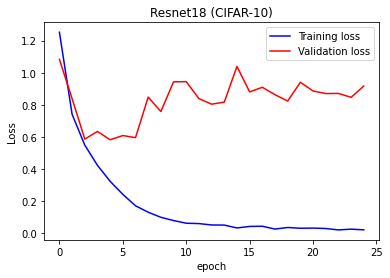

In [17]:
plt.figure()
epochs = 25
train_losses_numpy = torch.tensor(train_losses).cpu().detach().numpy()
val_losses_numpy = torch.tensor(val_losses).cpu().detach().numpy()
plt.plot(range(epochs),train_losses_numpy,'b',label='Training loss')
plt.plot(range(epochs),val_losses_numpy,'r',label='Validation loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Resnet18 (CIFAR-10)')
plt.legend()
plt.savefig('Loss.jpg')

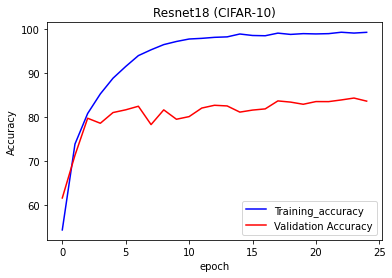

In [18]:
plt.figure()
train_accs_numpy = torch.tensor(train_accs).cpu().detach().numpy()
val_accs_numpy = torch.tensor(val_accs).cpu().detach().numpy()
plt.plot(range(epochs),train_accs_numpy,'b',label='Training_accuracy')
plt.plot(range(epochs),val_accs_numpy,'r',label='Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Resnet18 (CIFAR-10)')
plt.legend()
plt.savefig('accuracy.jpg')

### Questions 3.5

In [19]:
# For Q 3.6
if __name__ == "__main__":
  vis_image = None
  for data, labels in val_loader:
    vis_image = data[12].unsqueeze(0)
    break

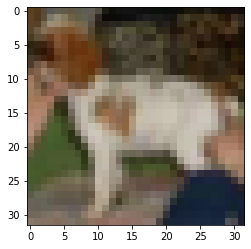

In [20]:
# You can also upload `vis_image.pkl` from Piazza and use it:
import pickle
vis_image = pickle.load(open("vis_image.pkl", "rb")).to(device)
plt.imshow(vis_image.squeeze().permute(1, 2, 0).cpu().detach().numpy())

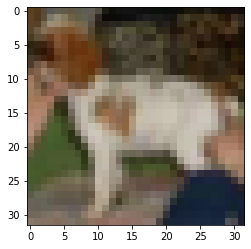

In [21]:
import matplotlib.pyplot as plt
plt.imshow(vis_image.squeeze().permute(1, 2, 0).cpu().detach().numpy())

In [22]:
transform = transforms.Compose([
      transforms.ToTensor()
  ])
vis_image_numpy = vis_image.squeeze().permute(1, 2, 0).cpu().detach().numpy()
image = transform(vis_image_numpy)

In [23]:
# we will save the conv layer weights in this list
model_weights =[]
#we will save the 49 conv layers in this list
conv_layers = []
# get all the model children as list
model_children = list(model.children())
#counter to keep count of the conv layers
counter = 0
#append all the conv layers and their respective wights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")
print(conv_layers)

Total convolution layers: 17
[Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(256

In [24]:
outputs = []
names = []
image = image.to(device)
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))
#print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

17
torch.Size([64, 32, 32])
torch.Size([64, 32, 32])
torch.Size([64, 32, 32])
torch.Size([64, 32, 32])
torch.Size([64, 32, 32])
torch.Size([128, 16, 16])
torch.Size([128, 16, 16])
torch.Size([128, 16, 16])
torch.Size([128, 16, 16])
torch.Size([256, 8, 8])
torch.Size([256, 8, 8])
torch.Size([256, 8, 8])
torch.Size([256, 8, 8])
torch.Size([512, 4, 4])
torch.Size([512, 4, 4])
torch.Size([512, 4, 4])
torch.Size([512, 4, 4])


In [25]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(8, 8)
(8, 8)
(8, 8)
(8, 8)
(4, 4)
(4, 4)
(4, 4)
(4, 4)


torch.Size([256, 256, 3, 3])


ValueError: ignored

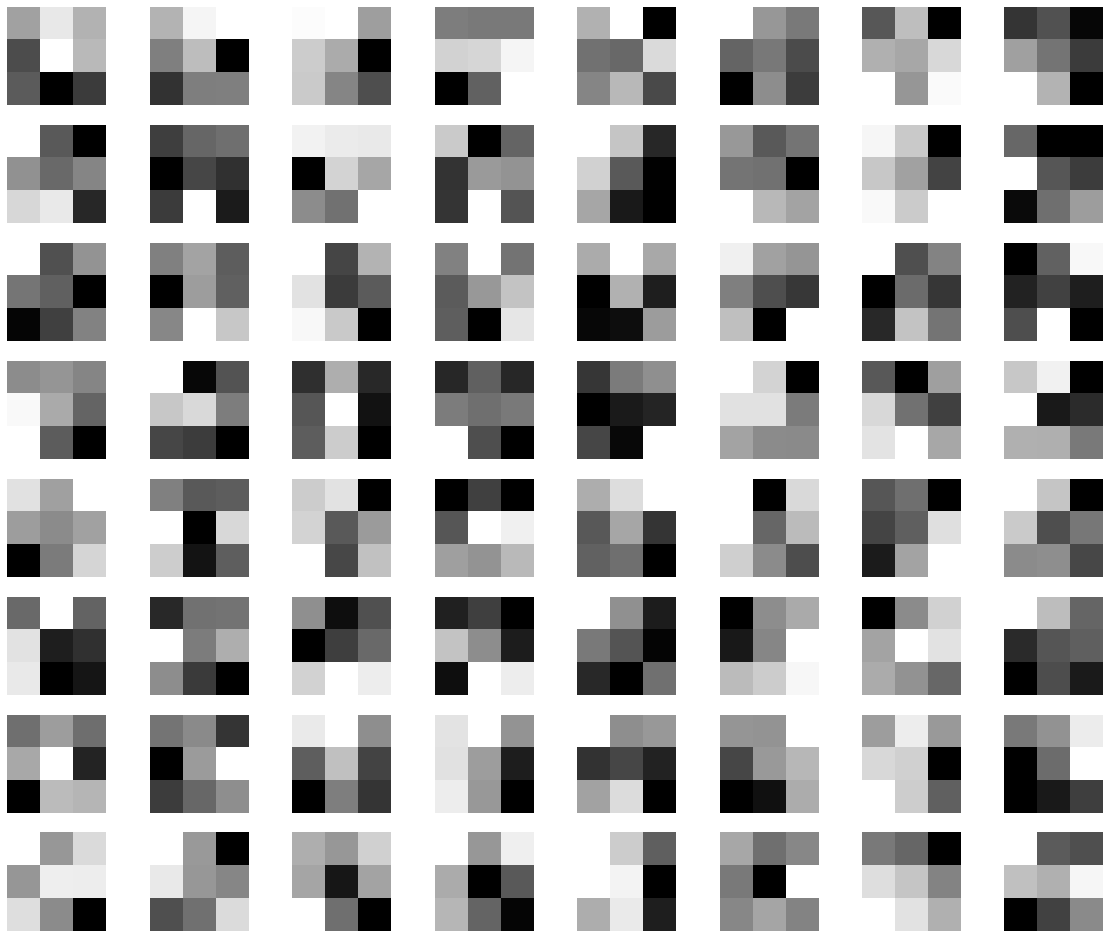

In [54]:
# visualize the first conv layer filters
plt.figure(figsize=(20, 17))
num_conv_layer = 12
num_i = model_weights[num_conv_layer].shape[0]
print(model_weights[num_conv_layer].shape)
for i, filter in enumerate(model_weights[num_conv_layer]):
    #print(filter.shape)
    plt.subplot(8, 8, i+1) 
    plt.imshow(filter[0, :, :].cpu().detach(), cmap='gray')
    #plt.imshow(filter.cpu().detach(), cmap='gray')
    plt.axis('off')
    plt.savefig('filter_conv_layer'+str(num_conv_layer)+'.png')
plt.show()

### Questions 3.6

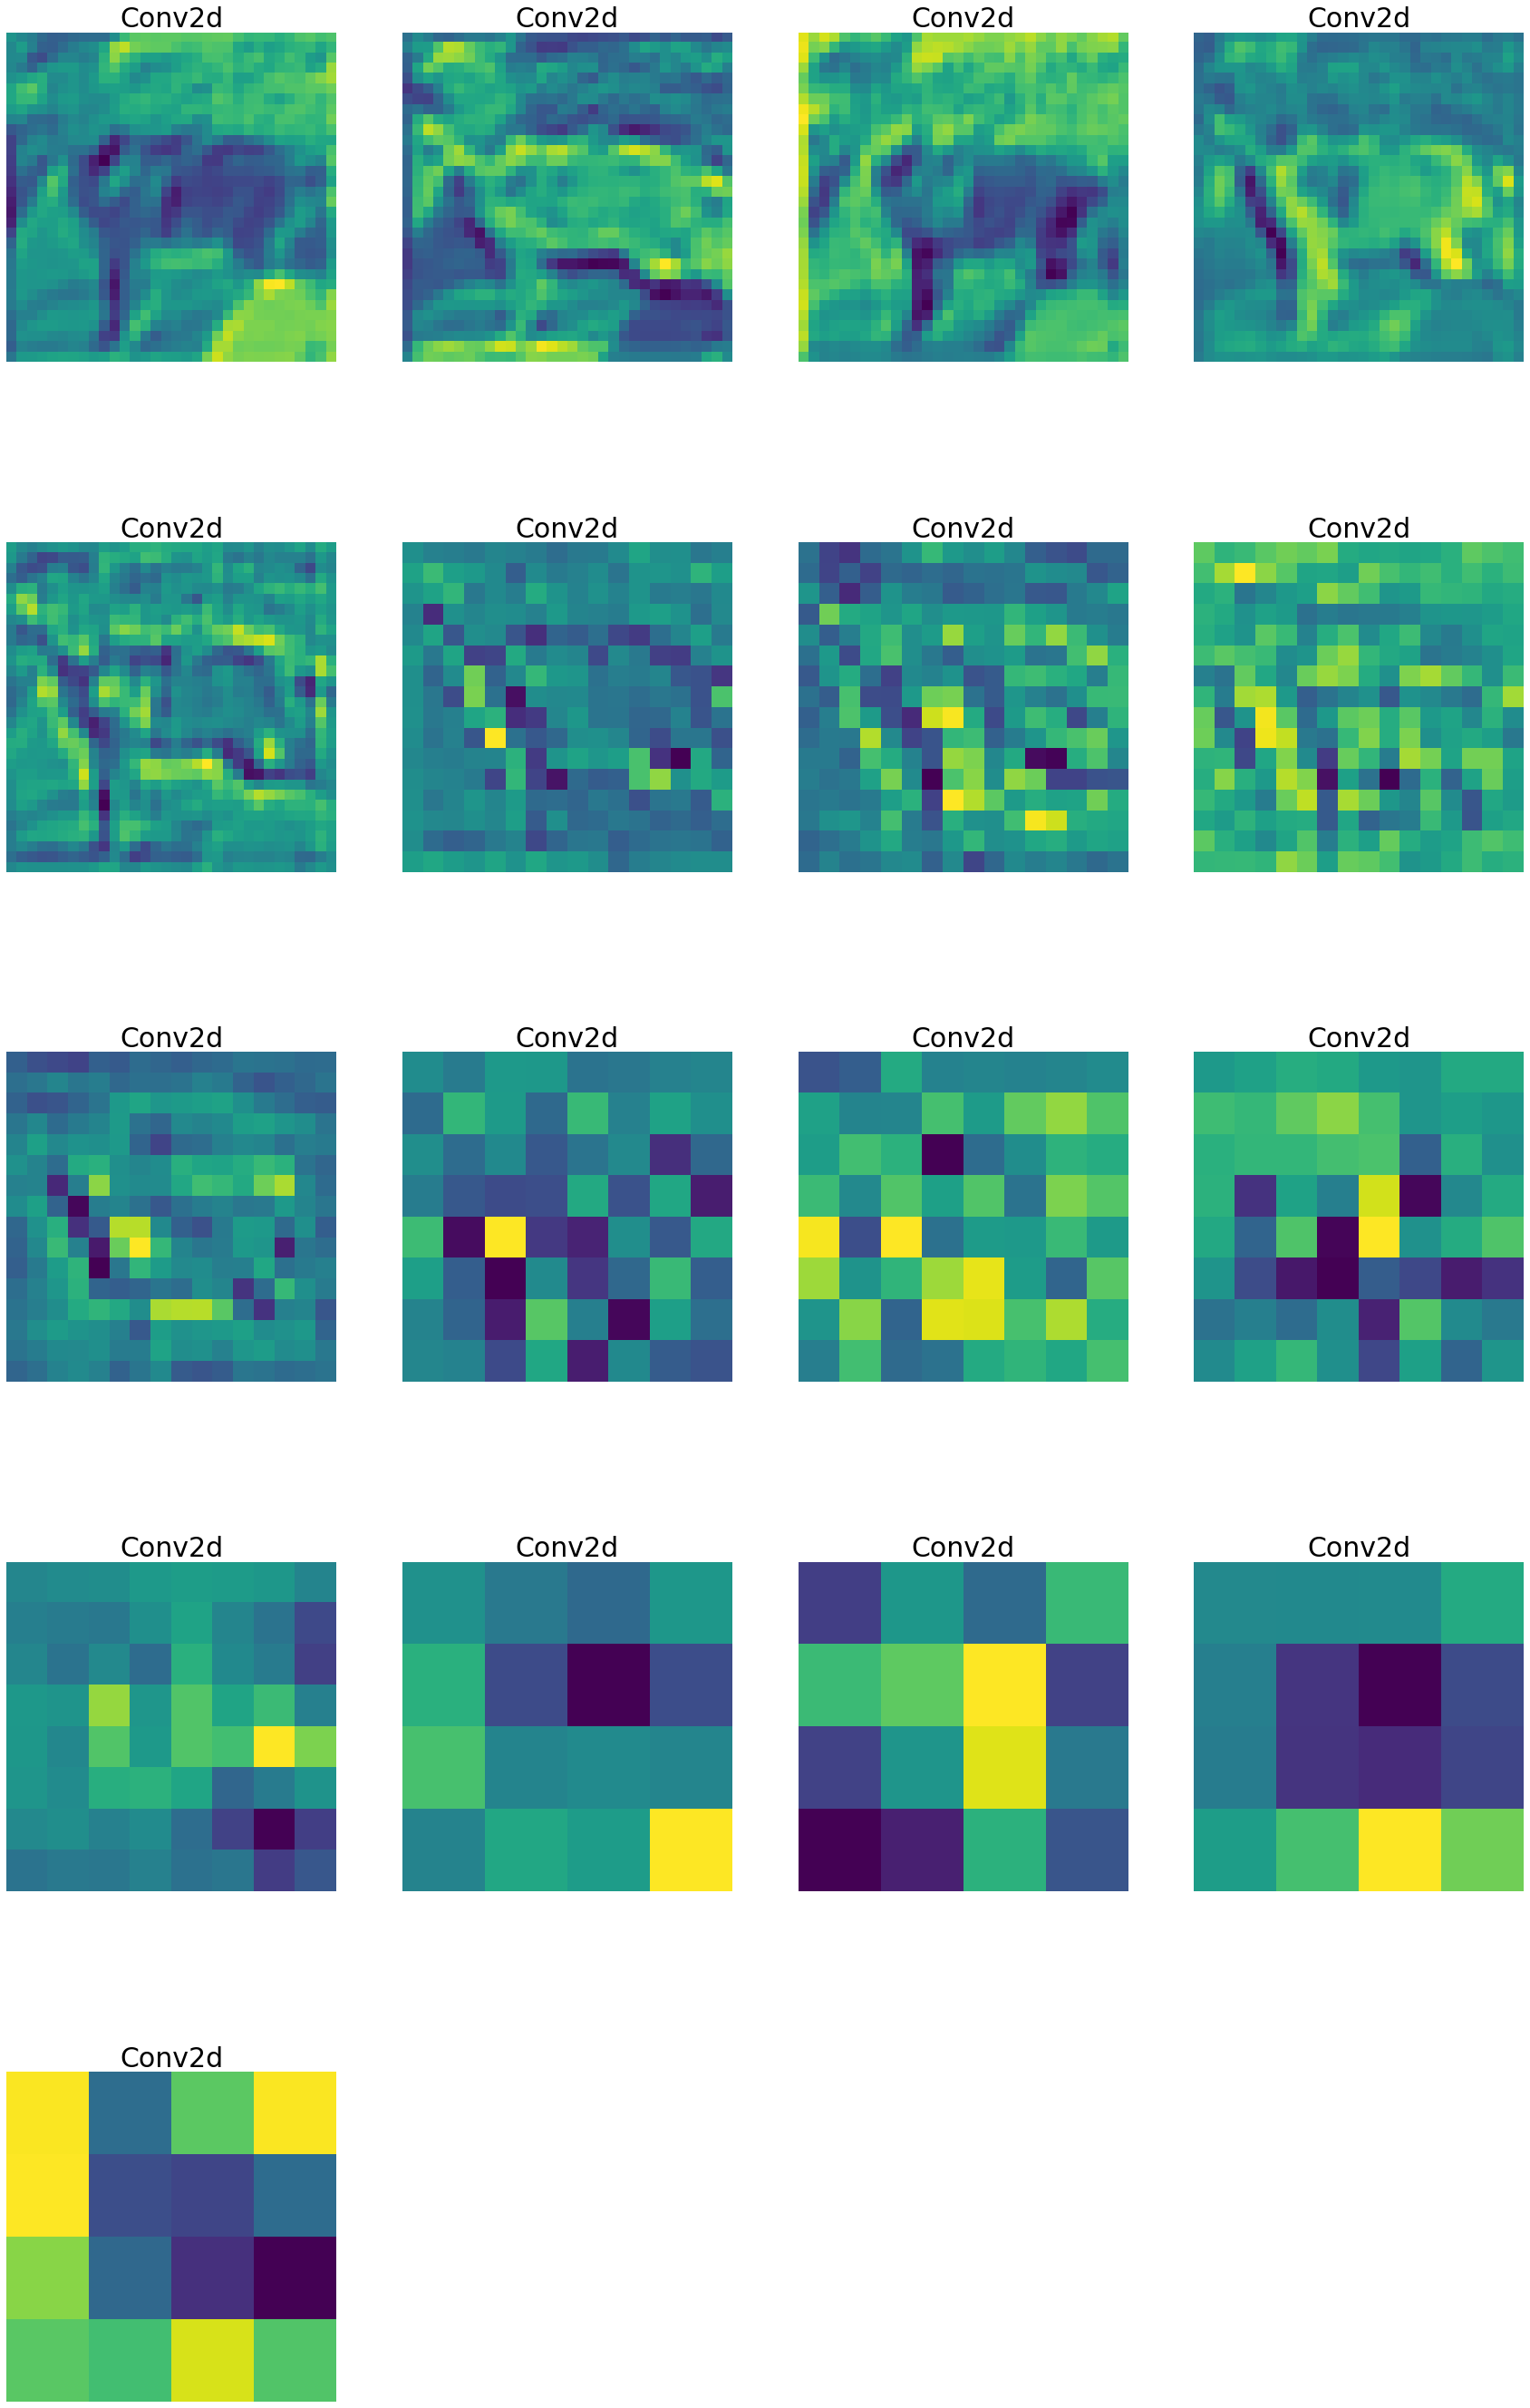

In [27]:
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(5, 4, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)
plt.savefig(str('feature_maps.jpg'), bbox_inches='tight')

### Questions 3.7

In [196]:
hyper_parameters= {"activation_str":['relu','tanh'], "initialization":["xavier_normal","xavier_uniform","kaiming_normal"]   }

#{"model_architecture":[(400,500),(500,600),(600,500),(500,700)],"learning_rate":[0.1,0.01,0.001,0.0001],"non_linearity":['softmax','tanh'],"mini_batch":[16,32,64]}
train_loader, val_loader = get_cifar10()
train_accs, train_losses, val_accs, val_losses = [], [], [], []
n_epochs = 25
for activation_str in hyper_parameters["activation_str"]:
    for initialization in hyper_parameters["initialization"]:
      print(f'Results of the activation funciton = {activation_str}, initialization = {initialization}')
      model_search = ResNet18(
          activation_str=activation_str,
          initialization=initialization
        ).to(device)
      criterion = nn.CrossEntropyLoss()
      optimizer = optim.Adam(model_search.parameters())

      for epoch in range(n_epochs):
        # Training
        train_acc, train_loss = train_loop(epoch, model_search, train_loader, criterion, optimizer)
        train_accs.append(train_acc)
        train_losses.append(train_loss)

        # Validation
        val_acc, val_loss = valid_loop(epoch, model_search, val_loader, criterion)
        val_accs.append(val_acc)
        val_losses.append(val_loss)

      torch.save(model_search,'model_search_'+activation_str+'_'+initialization+'_.pt')

Files already downloaded and verified
Files already downloaded and verified
Results of the activation funciton = relu , initialization = xavier_normal
Epoch: 0 | Train Acc: 53.827999 | Train Loss: 1.262013
Epoch: 0 | Val Acc: 59.489998   | Val Loss: 1.131897
Epoch: 1 | Train Acc: 73.152000 | Train Loss: 0.764635
Epoch: 1 | Val Acc: 73.839996   | Val Loss: 0.750811


KeyboardInterrupt: ignored

### Questions 3.8

In [76]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
pytorch_total_params

11173962

In [141]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32*3, 1024)
        self.bn1 = nn.BatchNorm1d(num_features=1024)
        self.fc2 = nn.Linear(1024, 84)
        self.fc3 = nn.Linear(84, 10)
        #self.dropout = nn.Dropout(0.25)
        self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(F.relu(x))
        #x = self.dropout(x)
        x = self.fc2(F.relu(self.bn1(x)))
        #x = self.dropout(x)
        x = self.fc3(F.relu(x))
        x = self.sm(x)
        return x

In [190]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32*32*3, 2088)
        self.bn1 = nn.BatchNorm1d(num_features=2088)
        self.fc2 = nn.Linear(2088, 1536)
        self.fc3 = nn.Linear(1536, 768)
        self.fc4 = nn.Linear(768, 384)
        self.fc5 = nn.Linear(384, 128)
        self.fc6 = nn.Linear(128, 10)
        #self.dropout = nn.Dropout(0.25)
        #self.sm = nn.Softmax(dim=1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(F.relu(x))
        #x = self.dropout(x)
        x = self.fc2(F.relu(self.bn1(x)))
        #x = self.dropout(x)
        x = self.fc3(F.relu(x))
        #x = self.dropout(x)
        x = self.fc4(F.relu(x))
        #x = self.dropout(x)
        x = self.fc5(F.relu(x))  
        x = self.fc6(F.relu(x))        
        #x = self.sm(x)
        return x

In [191]:
model_mlp = Net().to(device)
pytorch_total_params_mlp = sum(p.numel() for p in model_mlp.parameters())
pytorch_total_params_mlp

11155586

In [192]:
pytorch_total_params_mlp - pytorch_total_params

-18376

In [193]:
train_accs, train_losses, val_accs, val_losses = [], [], [], []
n_epochs = 25


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mlp.parameters(),lr=0.01)

train_loader, val_loader = get_cifar10()

for epoch in range(n_epochs):
  # Training
  train_acc, train_loss = train_loop(epoch, model_mlp, train_loader, criterion, optimizer)
  train_accs.append(train_acc)
  train_losses.append(train_loss)

  # Validation
  val_acc, val_loss = valid_loop(epoch, model_mlp, val_loader, criterion)
  val_accs.append(val_acc)
  val_losses.append(val_loss)

Files already downloaded and verified
Files already downloaded and verified
Epoch: 0 | Train Acc: 29.528000 | Train Loss: 1.993964
Epoch: 0 | Val Acc: 34.529999   | Val Loss: 1.789685
Epoch: 1 | Train Acc: 39.770000 | Train Loss: 1.678839
Epoch: 1 | Val Acc: 41.039997   | Val Loss: 1.644224
Epoch: 2 | Train Acc: 44.293999 | Train Loss: 1.554275
Epoch: 2 | Val Acc: 43.079998   | Val Loss: 1.658580
Epoch: 3 | Train Acc: 47.683998 | Train Loss: 1.469916
Epoch: 3 | Val Acc: 45.649998   | Val Loss: 1.526562
Epoch: 4 | Train Acc: 49.750000 | Train Loss: 1.410432
Epoch: 4 | Val Acc: 44.489998   | Val Loss: 1.583585
Epoch: 5 | Train Acc: 51.963997 | Train Loss: 1.354393
Epoch: 5 | Val Acc: 44.829998   | Val Loss: 1.584415
Epoch: 6 | Train Acc: 53.660000 | Train Loss: 1.308740
Epoch: 6 | Val Acc: 47.770000   | Val Loss: 1.502146
Epoch: 7 | Train Acc: 55.313999 | Train Loss: 1.259795
Epoch: 7 | Val Acc: 44.399998   | Val Loss: 1.583476
Epoch: 8 | Train Acc: 57.365997 | Train Loss: 1.213105
Epoch

In [197]:
torch.save(model_mlp,'mlp_model.pt')
#torch.save(model.state_dict(), 'resnet18_model_weights.pt')